In [1]:
import pandas as pd

# Load datasets
customers_df = pd.read_csv('Customers.csv')
products_df = pd.read_csv('Products.csv')
transactions_df = pd.read_csv('Transactions.csv')


In [2]:
# Check for missing values
print(customers_df.info(), products_df.info(), transactions_df.info())

# View basic statistics
print(customers_df.describe(include='all'))
print(products_df.describe(include='all'))
print(transactions_df.describe(include='all'))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.2+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  


In [3]:
transactions_merged = transactions_df.merge(customers_df, on='CustomerID', how='left')
transactions_merged = transactions_merged.merge(products_df, on='ProductID', how='left')


Matplotlib is building the font cache; this may take a moment.


CustomerID
C0109    11
C0156    11
C0008    10
C0141    10
C0175    10
Name: count, dtype: int64
CustomerID
C0141    10673.87
C0054     8040.39
C0065     7663.70
C0156     7634.45
C0082     7572.91
C0188     7111.32
C0059     7073.28
C0028     6819.57
C0099     6715.72
C0165     6708.10
Name: TotalValue, dtype: float64


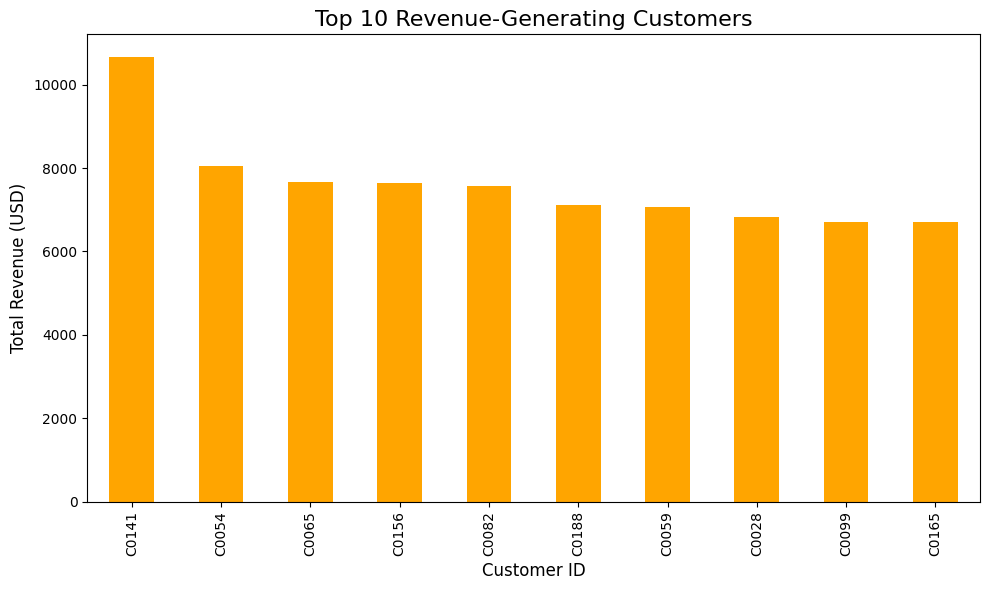

In [5]:
import matplotlib.pyplot as plt
top_customers = transactions_merged['CustomerID'].value_counts().head(5)
print(top_customers)
# Revenue by customer
customer_revenue = transactions_merged.groupby('CustomerID')['TotalValue'].sum().sort_values(ascending=False).head(10)

# Display top customers
print(customer_revenue)
# Bar chart of top customers by revenue
plt.figure(figsize=(10, 6))
customer_revenue.plot(kind='bar', color='orange')
plt.title('Top 10 Revenue-Generating Customers', fontsize=16)
plt.xlabel('Customer ID', fontsize=12)
plt.ylabel('Total Revenue (USD)', fontsize=12)
plt.tight_layout()
plt.show()


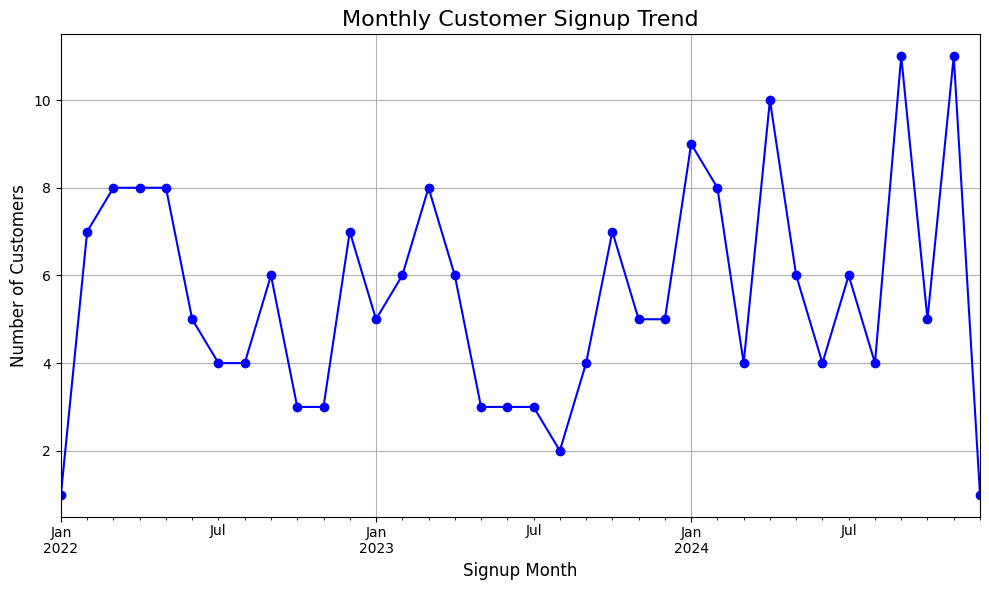

In [6]:
customers_df['SignupDate'] = pd.to_datetime(customers_df['SignupDate'], errors='coerce')
signup_trend = customers_df.groupby(customers_df['SignupDate'].dt.to_period('M')).size()
# Plot customer signup trend
plt.figure(figsize=(10, 6))
signup_trend.plot(kind='line', marker='o', color='b')
plt.title('Monthly Customer Signup Trend', fontsize=16)
plt.xlabel('Signup Month', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.grid()
plt.tight_layout()
plt.show()


In [14]:
revenue_by_region = transactions_merged.groupby('Region')['TotalValue'].sum()
print(revenue_by_region)
revenue_by_category = transactions_merged.groupby('Category')['TotalValue'].sum()
print(revenue_by_category)

Region
Asia             152074.97
Europe           166254.63
North America    152313.40
South America    219352.56
Name: TotalValue, dtype: float64
Category
Books          192147.47
Clothing       166170.66
Electronics    180783.50
Home Decor     150893.93
Name: TotalValue, dtype: float64


Month
2023-12     3769.52
2024-01    66376.39
2024-02    51459.27
2024-03    47828.73
2024-04    57519.06
2024-05    64527.74
2024-06    48771.18
2024-07    71366.39
2024-08    63436.74
2024-09    70603.75
2024-10    47063.22
2024-11    38224.37
2024-12    59049.20
Freq: M, Name: TotalValue, dtype: float64


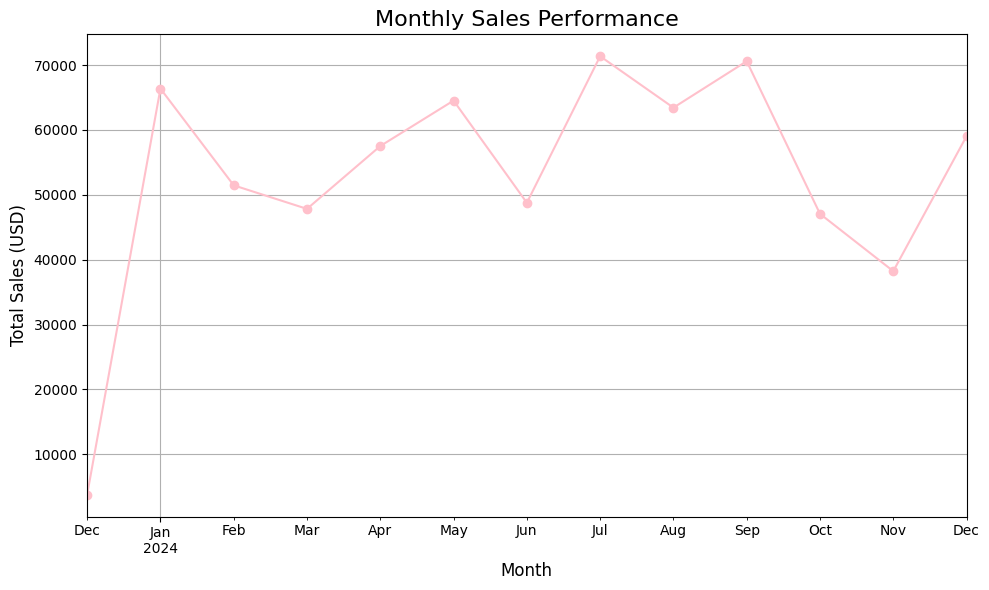

In [9]:
transactions_merged['TransactionDate'] = pd.to_datetime(transactions_merged['TransactionDate'], errors='coerce')
# Extract month and year
transactions_merged['Month'] = transactions_merged['TransactionDate'].dt.to_period('M')

# Total sales by month
monthly_sales = transactions_merged.groupby('Month')['TotalValue'].sum()

# Display monthly sales
print(monthly_sales)
# Total sales by month
monthly_sales = transactions_merged.groupby('Month')['TotalValue'].sum()

# Plot sales by month
plt.figure(figsize=(10, 6))
monthly_sales.plot(kind='line', marker='o', color='pink')
plt.title('Monthly Sales Performance', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Sales (USD)', fontsize=12)
plt.grid()
plt.tight_layout()
plt.show()


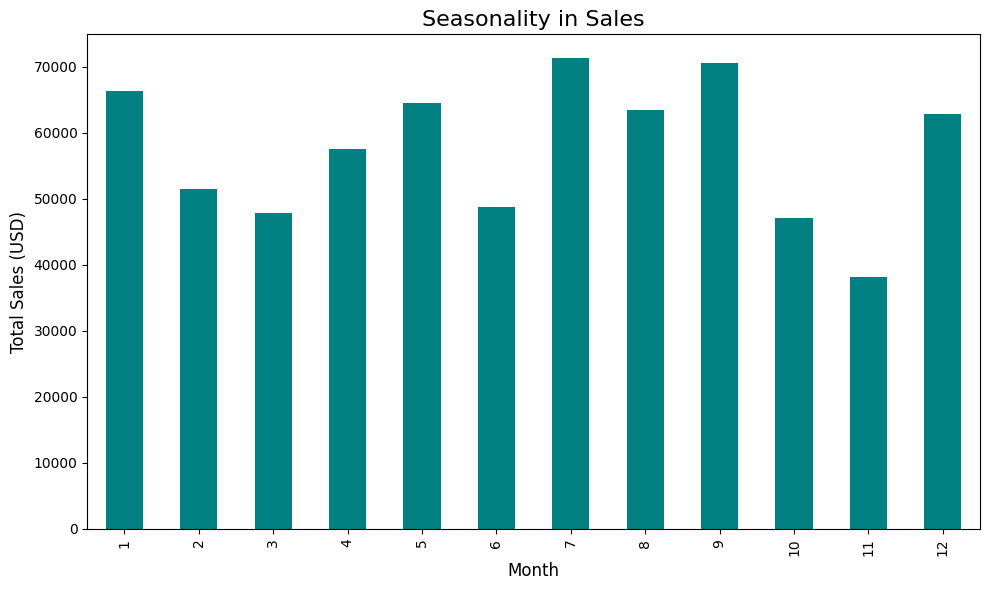

In [10]:
# Sales by month
transactions_merged['Month'] = transactions_merged['TransactionDate'].dt.month
monthly_sales_seasonality = transactions_merged.groupby('Month')['TotalValue'].sum()

# Plot seasonality
plt.figure(figsize=(10, 6))
monthly_sales_seasonality.plot(kind='bar', color='teal')
plt.title('Seasonality in Sales', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Sales (USD)', fontsize=12)
plt.tight_layout()
plt.show()

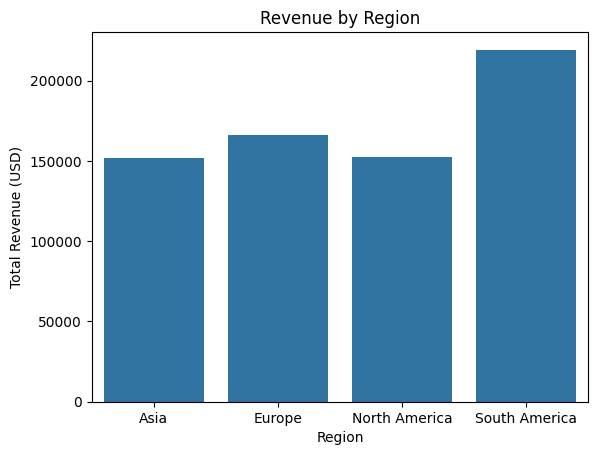

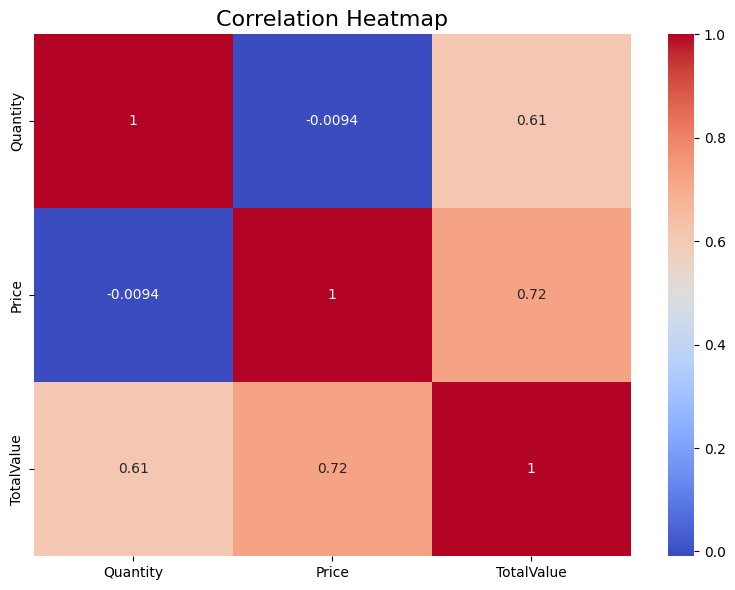

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import os
# Example: Revenue by Region
sns.barplot(x=revenue_by_region.index, y=revenue_by_region.values)
plt.title("Revenue by Region")
plt.xlabel("Region")
plt.ylabel("Total Revenue (USD)")
plt.show()
# Add 'Price' column if not present
if 'Price' not in transactions_merged.columns:
    transactions_merged['Price'] = transactions_merged['TotalValue'] / transactions_merged['Quantity']

# Correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(transactions_merged[['Quantity', 'Price', 'TotalValue']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap', fontsize=16)
plt.tight_layout()
plt.show()
